In [1]:
import cairo
from IPython.display import Image, display
from math import pi
from io import BytesIO
import numpy as np
import Shapes

def disp(draw_func):
    surface = cairo.ImageSurface(cairo.FORMAT_ARGB32, 1000, 1000)
    context = cairo.Context(surface)
    matrix = cairo.Matrix(yy=-1, y0=surface.get_height())
    context.transform(matrix)
    draw_func(context, 1000, 1000)
    with BytesIO() as fileobj:
        surface.write_to_png(fileobj)
        display(Image(fileobj.getvalue(), width=200))

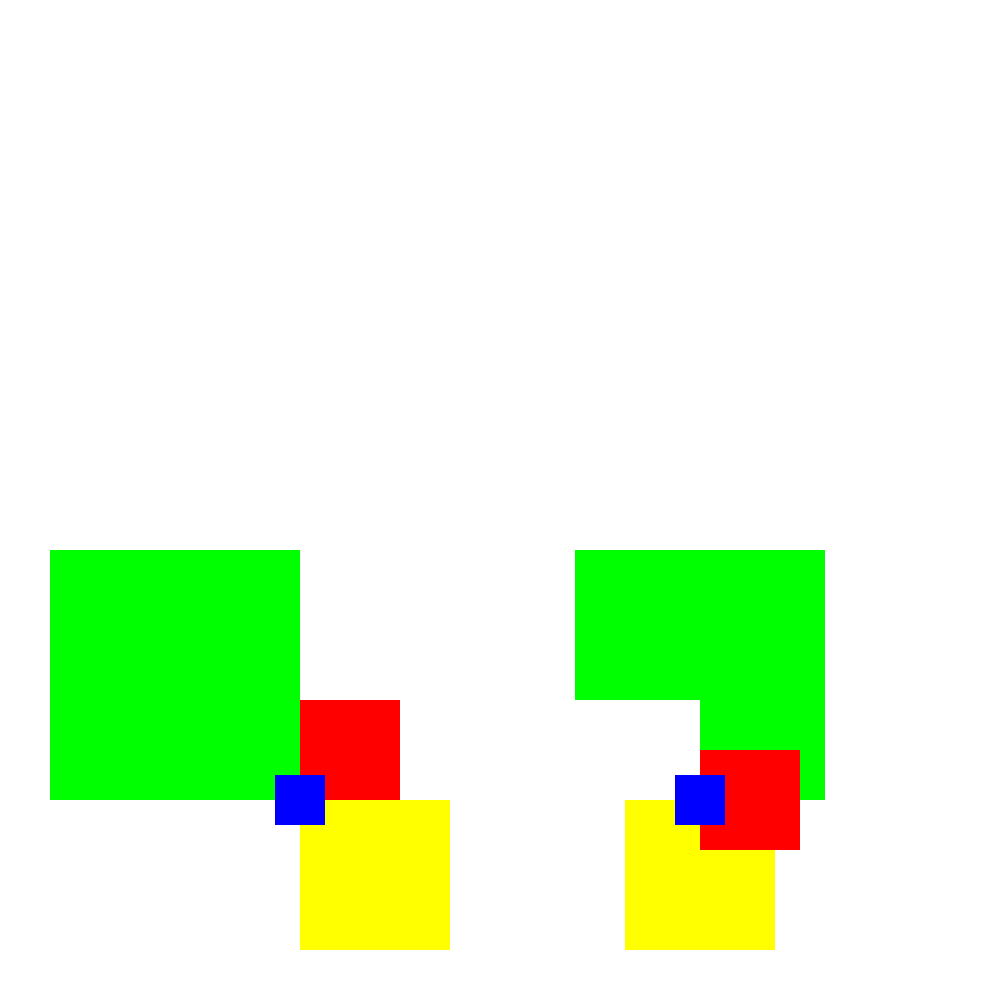

In [2]:
@disp
def draw(context, width, height):
    rect1 = Shapes.My_Rectangle(
        ref_pt="bot_left", ref_pt_x=300, ref_pt_y=200, width=100, height=100
    )
    rect2 = Shapes.My_Rectangle(
        ref_pt="top_left", ref_pt_x=300, ref_pt_y=200, width=150, height=150
    )
    rect3 = Shapes.My_Rectangle(
        ref_pt="top_right", ref_pt_x=300, ref_pt_y=200, width=200, height=200
    )
    rect4 = Shapes.My_Rectangle(
        ref_pt="bot_right", ref_pt_x=300, ref_pt_y=200, width=250, height=250
    )
    rect5 = Shapes.My_Rectangle(
        ref_pt="center", ref_pt_x=300, ref_pt_y=200, width=50, height=50
    )

    rect1.draw_fill(context, 1, 0, 0)
    rect2.draw_fill(context, 1, 1, 0)
    rect3.draw_fill(context, 1, 1, 1)
    rect4.draw_fill(context, 0, 1, 0)
    rect5.draw_fill(context, 0, 0, 1)

    rect1 = Shapes.My_Rectangle(
        ref_pt="mid_left", ref_pt_x=300, ref_pt_y=200, width=100, height=100
    )
    rect2 = Shapes.My_Rectangle(
        ref_pt="mid_top", ref_pt_x=300, ref_pt_y=200, width=150, height=150
    )
    rect3 = Shapes.My_Rectangle(
        ref_pt="mid_right", ref_pt_x=300, ref_pt_y=200, width=200, height=200
    )
    rect4 = Shapes.My_Rectangle(
        ref_pt="mid_bot", ref_pt_x=300, ref_pt_y=200, width=250, height=250
    )

    rect1.translate(400, 0)
    rect2.translate(400, 0)
    rect3.translate(400, 0)
    rect4.translate(400, 0)
    rect5.translate(400, 0)

    rect4.draw_fill(context, 0, 1, 0)
    rect3.draw_fill(context, 1, 1, 1)
    rect2.draw_fill(context, 1, 1, 0)
    rect1.draw_fill(context, 1, 0, 0)
    rect5.draw_fill(context, 0, 0, 1)


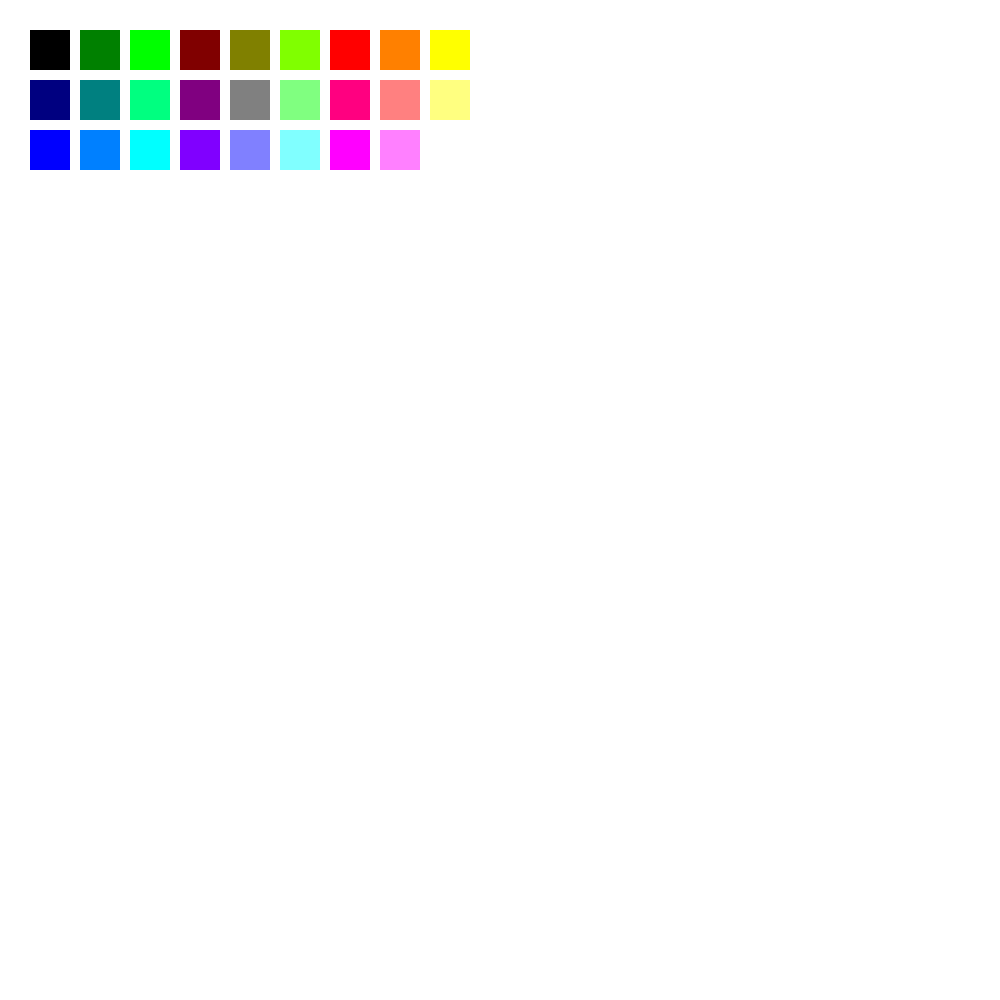

In [3]:
@disp
def draw(context, width, height):
    rect1 = Shapes.My_Rectangle(
        ref_pt="center", ref_pt_x=50, ref_pt_y=950, width=40, height=40
    )

    colors_per_col = 3
    count = 0

    for color1 in np.linspace(0, 1, colors_per_col):
        for color2 in np.linspace(0, 1, colors_per_col):
            for color3 in np.linspace(0, 1, colors_per_col):
                rect1.draw_fill(context, color1, color2, color3)
                rect1.translate(0, -50)
                count += 1
                if count >= colors_per_col:
                    rect1.move_bbox_y_to("center", 950)
                    rect1.translate(50, 0)
                    count = 0

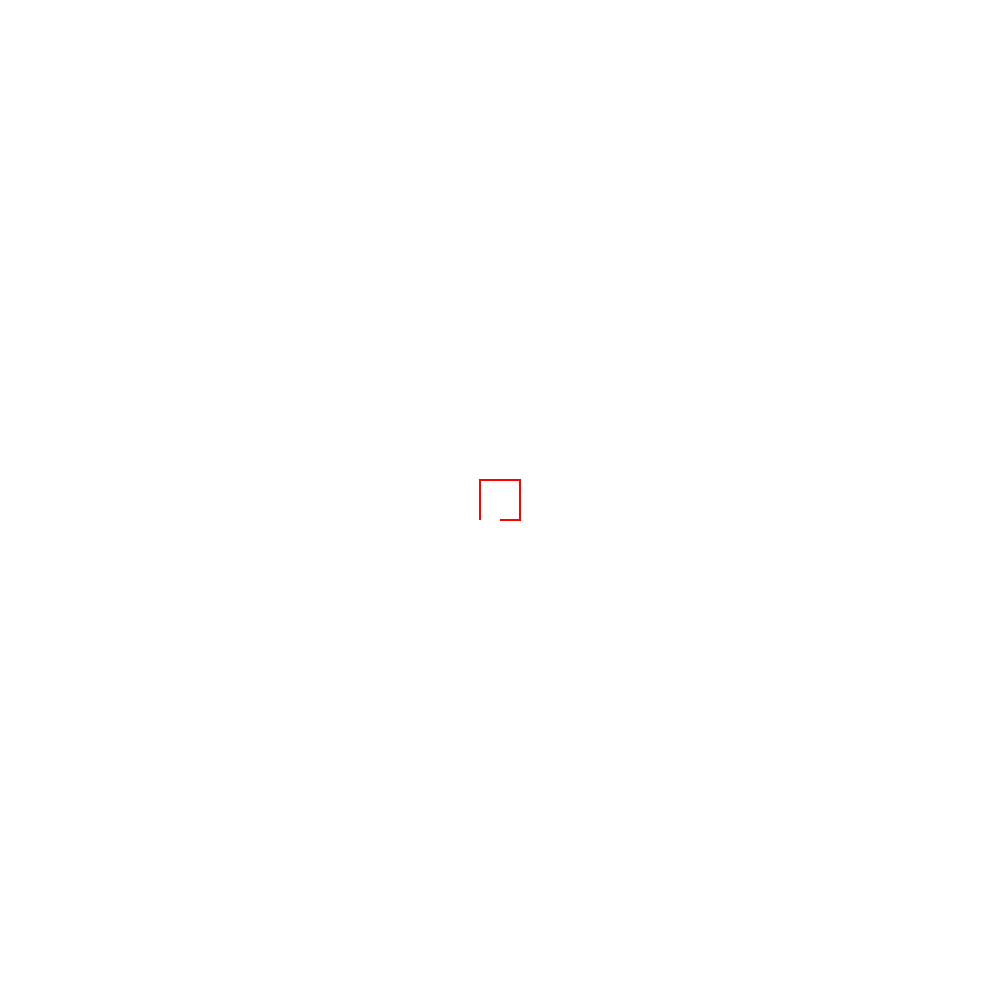

In [4]:
@disp
def draw(context, width, height):
    rect1 = Shapes.My_Rectangle(
        ref_pt="center", ref_pt_x=500, ref_pt_y=500, width=40, height=40
    )

    # rect1.draw_fill(context, 0, 1, 0)

    # print(rect1._matrix)
    # print(rect1._matrix.min(dim="pt"))
    # print(rect1._matrix.min(dim="pt").loc[dict(dim="x")])

    # print(rect1._matrix.max(dim="pt").loc[dict(dim="y")])
    # print(rect1._matrix.min(dim="pt").loc[dict(dim="y")])
    # print((rect1._matrix.max(dim="pt").loc[dict(dim="y")] - rect1._matrix.min(dim="pt").loc[dict(dim="y")])/ 2)

    context.set_source_rgb(1, 0, 0)

    # print(rect1.bbox_bot_left)
    # print(rect1.bbox_top_right)
    # print(rect1.bbox_mid_bot)

    
    context.move_to(rect1.bbox_bot_left.loc[dict(dim="x")], rect1.bbox_bot_left.loc[dict(dim="y")])
    context.line_to(rect1.bbox_mid_left.loc[dict(dim="x")], rect1.bbox_mid_left.loc[dict(dim="y")])
    context.line_to(rect1.bbox_top_left.loc[dict(dim="x")], rect1.bbox_top_left.loc[dict(dim="y")])
    context.line_to(rect1.bbox_mid_top.loc[dict(dim="x")], rect1.bbox_mid_top.loc[dict(dim="y")])
    context.line_to(rect1.bbox_top_right.loc[dict(dim="x")], rect1.bbox_top_right.loc[dict(dim="y")])
    context.line_to(rect1.bbox_mid_right.loc[dict(dim="x")], rect1.bbox_mid_right.loc[dict(dim="y")])
    context.line_to(rect1.bbox_bot_right.loc[dict(dim="x")], rect1.bbox_bot_right.loc[dict(dim="y")])
    context.line_to(rect1.bbox_mid_bot.loc[dict(dim="x")], rect1.bbox_mid_bot.loc[dict(dim="y")])
    context.stroke()

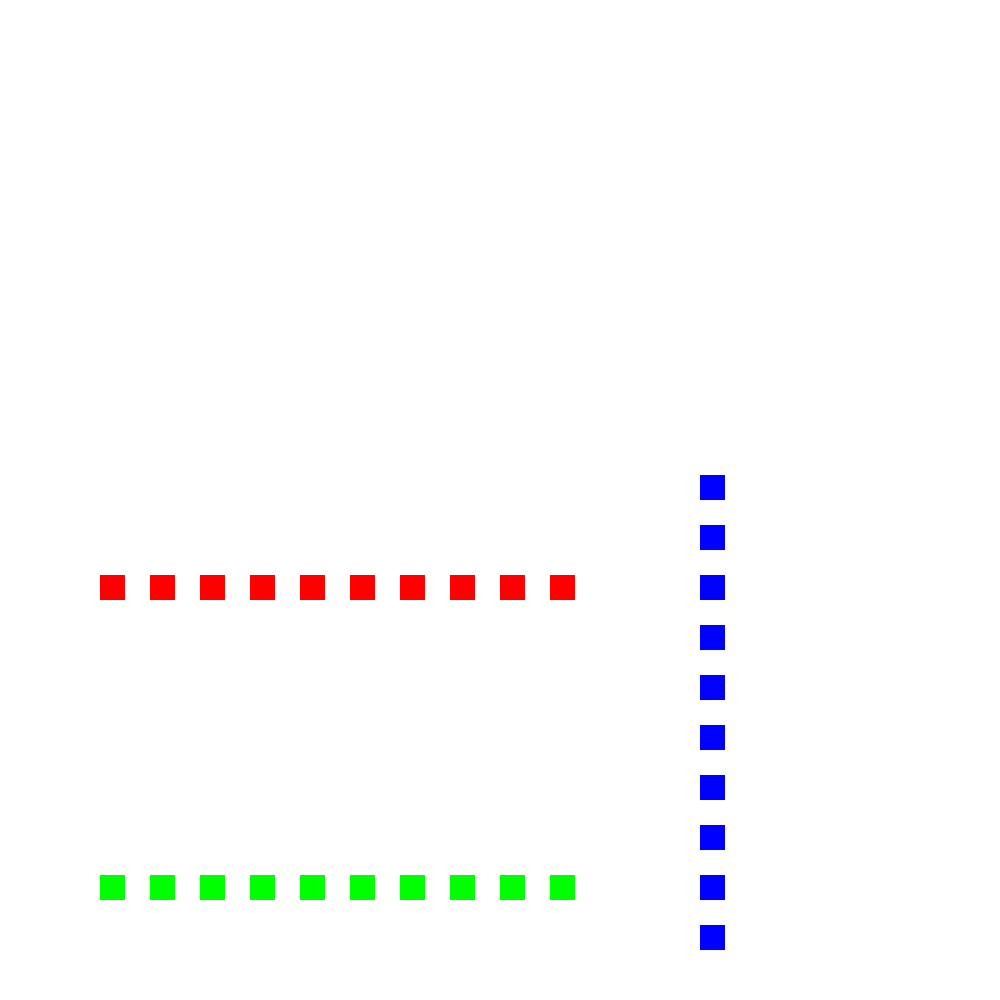

In [5]:
@disp
def draw(context, width, height):
    rect1 = Shapes.My_Rectangle(
        ref_pt="bot_left", ref_pt_x=100, ref_pt_y=100, width=25, height=25
    )

    rect1.draw_fill(context, 0, 1, 0)

    rect1.move_bbox_xy_to("bot_left", 150, 100)
    rect1.draw_fill(context, 0, 1, 0)
    rect1.move_bbox_xy_to("mid_left", 200, 112.5)
    rect1.draw_fill(context, 0, 1, 0)
    rect1.move_bbox_xy_to("top_left", 250, 125)
    rect1.draw_fill(context, 0, 1, 0)
    rect1.move_bbox_xy_to("mid_top", 312.5, 125)
    rect1.draw_fill(context, 0, 1, 0)
    rect1.move_bbox_xy_to("top_right", 375, 125)
    rect1.draw_fill(context, 0, 1, 0)
    rect1.move_bbox_xy_to("mid_right", 425, 112.5)
    rect1.draw_fill(context, 0, 1, 0)
    rect1.move_bbox_xy_to("bot_right", 475, 100)
    rect1.draw_fill(context, 0, 1, 0)
    rect1.move_bbox_xy_to("mid_bot", 512.5, 100)
    rect1.draw_fill(context, 0, 1, 0)
    rect1.move_bbox_xy_to("center", 562.5, 112.5)
    rect1.draw_fill(context, 0, 1, 0)

    rect2 = Shapes.My_Rectangle(
        ref_pt="bot_left", ref_pt_x=100, ref_pt_y=400, width=25, height=25
    )

    rect2.draw_fill(context, 1, 0, 0)

    rect2.move_bbox_x_to("bot_left", 150)
    rect2.draw_fill(context, 1, 0, 0)
    rect2.move_bbox_x_to("mid_left", 200)
    rect2.draw_fill(context, 1, 0, 0)
    rect2.move_bbox_x_to("top_left", 250)
    rect2.draw_fill(context, 1, 0, 0)
    rect2.move_bbox_x_to("mid_top", 312.5)
    rect2.draw_fill(context, 1, 0, 0)
    rect2.move_bbox_x_to("top_right", 375)
    rect2.draw_fill(context, 1, 0, 0)
    rect2.move_bbox_x_to("mid_right", 425)
    rect2.draw_fill(context, 1, 0, 0)
    rect2.move_bbox_x_to("bot_right", 475)
    rect2.draw_fill(context, 1, 0, 0)
    rect2.move_bbox_x_to("mid_bot", 512.5)
    rect2.draw_fill(context, 1, 0, 0)
    rect2.move_bbox_x_to("center", 562.5)
    rect2.draw_fill(context, 1, 0, 0)

    rect3 = Shapes.My_Rectangle(
        ref_pt="bot_left", ref_pt_x=700, ref_pt_y=50, width=25, height=25
    )

    rect3.draw_fill(context, 0, 0, 1)

    rect3.move_bbox_y_to("bot_left", 100)
    rect3.draw_fill(context, 0, 0, 1)
    rect3.move_bbox_y_to("mid_left", 162.5)
    rect3.draw_fill(context, 0, 0, 1)
    rect3.move_bbox_y_to("top_left", 225)
    rect3.draw_fill(context, 0, 0, 1)
    rect3.move_bbox_y_to("mid_top", 275)
    rect3.draw_fill(context, 0, 0, 1)
    rect3.move_bbox_y_to("top_right", 325)
    rect3.draw_fill(context, 0, 0, 1)
    rect3.move_bbox_y_to("mid_right", 362.5)
    rect3.draw_fill(context, 0, 0, 1)
    rect3.move_bbox_y_to("bot_right", 400)
    rect3.draw_fill(context, 0, 0, 1)
    rect3.move_bbox_y_to("mid_bot", 450)
    rect3.draw_fill(context, 0, 0, 1)
    rect3.move_bbox_y_to("center", 512.5)
    rect3.draw_fill(context, 0, 0, 1)